# Border Screening for COVID-19

----

This notebook is to be used to obtain detection rates from the BoarderScreening code for a range of scenarios specific to the currently ongoing COVID-19 disease outbreak. The data obtained in this notebook is to be used in the border screening paper, where it will be used to quantify the impact of using border screening as a risk reducing method during this outbreaks.

The range of scenarios shall be defined by a variations in flight time, as well as infection window. This then describes situations where the outbreak has occured in countries of varying distance away from the destination country, as well as simulating a varying range of times that the disease has been prevalent in the countries.

In [1]:
from sira import border_screening
import numpy.random as rand
import scipy.stats as stats
import pandas as pd
import numpy as np

In [9]:
flight_ranges = [(3,5), (9,11), (15,17)]

covid_inc_dist = stats.lognorm

covid_inc_params = {'s':0.47238, 'scale': np.exp(1.6112)}

### Incubation period distributions

We now quickly test that these distributions look as they should. We therefore quickly draw the dstributions described above to see how they appear.

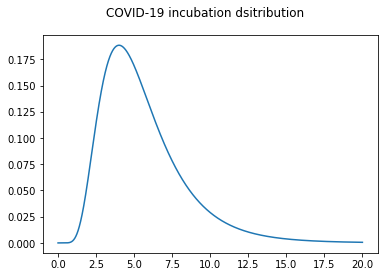

In [10]:
import matplotlib.pyplot as plt

time_range = np.linspace(0, 20, 10000)

fig, ax = plt.subplots(1,1)

fig.suptitle('COVID-19 incubation dsitribution')

ax.plot(time_range, covid_inc_dist.pdf(time_range, **covid_inc_params))
    
plt.show()

In [11]:
# This then gives a rough time scale of some disease of concern establishing and the authorities shutting the border.
# Although we are free to change this

border_shut = [72, 168, 336]

In [17]:
df = pd.DataFrame(columns=['Incubation distribution', 
                           'Exposure time range (time before flight)',
                           'Flight time range',
                           'Calculated border screening success rate'], index=range(1,10))

In [18]:
for i in range(9):
    fly = flight_ranges[i % 3]
    exp = border_shut[int(np.floor(i / 3))]
                          
    screening = border_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.lognormal, 
                          time_scale = 'days',
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'sigma':0.47238, 'mean': 1.6112},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             }
                          )
                          
    df.loc[i+1] = pd.Series({'Incubation distribution':'Log-Normal (mu: 1.6112, sigma: 0.47238)',
                           'Flight time range': 'Uniform {}'.format(fly), 
                           'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp), 
                           'Calculated border screening success rate': screening})

In [19]:
df

,Incubation distribution,Exposure time range (time before flight),Flight time range,Calculated border screening success rate
1,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 72)","Uniform (3, 5)",0.00830503
2,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 72)","Uniform (9, 11)",0.024882
3,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 72)","Uniform (15, 17)",0.0439793
4,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 168)","Uniform (3, 5)",0.0253212
5,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 168)","Uniform (9, 11)",0.065421
6,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 168)","Uniform (15, 17)",0.103289
7,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 336)","Uniform (3, 5)",0.0296564
8,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 336)","Uniform (9, 11)",0.0735405
9,"Log-Normal (mu: 1.6112, sigma: 0.47238)","Uniform (0, 336)","Uniform (15, 17)",0.119969


In [20]:
import os
cwd_path = os.getcwd()
save_path = os.path.join(cwd_path, 'BorderScreening_COVID.csv')

df.to_csv(save_path)